## CNN
    Convolutional Neural Network, 합성곱 신경망

동물의 시각 정보 처리 방식을 이미지 인식에 적용한 것이다.  
기존의 신경망은 이미지를 잘 다루기 위해 특징을 추출하고, 입력을 1차원 벡터로 만드는 단계가 필요했지만,  
CNN에서는 학습과정에 입력의 특징을 추출하는 방법도 함께 학습하게 된다.  
즉, 컨볼루션 필터를 통해 이미지 일부 영역의 특징을 파악하고 필터와의 합성곱을 통해 전체를 파악해나간다.
+ 필터에 따라 이미지에서 어떤 픽셀들이 강하게 반응하는지가 달라지게 된다.
+ [1, 0, 1,  
0, -4, 0,  
1, 0, 1] => 자기자신은 -4, 대각선 이웃값은 1인 라플리시안 필터의 경우 윤곽선 특징을 추출할 수 있다.  
+ 이미지를 잘 분석하기 위해 어떤 필터를 만들어 특징을 추출해야할까?  
    => 매번 필터를 만들지 말고, 기계가 스스로 좋은 필터를 만들어낼 순 없을까?  
    => 필터의 가중치를 모델의 파라미터로 만들자! => CNN의 기본 아이디어

하나의 필터만으로는 이미지의 특성을 다양하게 추출할 수 없다.  
N개의 필터를 모델의 파라미터로 두고 학습한다면, 하나의 이미지에 대해 N개의 특징 추출 결과를 얻을 수 있다.  
이것을 특성맵(Feature Map)이라 부르며, 이 때 학습해야 할 파라미터는 필터 N개가 가진 모든 요소들의 값이다.

### CNN의 문제점
1. 이미지가 작아진다.
    - 예를들어 6x6 이미지를 3x3 필터로 합성곱 연산했을 때 얻게되는 픽셀은 4x4의 크기가 된다.
    - 필터의 크기가 커질수록 결과는 더욱 더 작아질 것이다.
    - 연결망을 많이 거칠수록, 출력에 가까워질수록 이미지가 매우 작아질 것이다.  
    
    => 이미지 크기를 유지시키기 위해 Padding 사용

2. 특징 추상화 능력
    - 이미지가 작아지면서 이미지 전체의 특성을 잘 요약해낸 것이 아니라,  
    이미지의 가장자리 정보들이 소실되고 중심부의 정보만 살아남는 것으로,   
    정보를 추상화시키는 과정이 아니다.
    - 정보를 요약하지 않으면 입력단계의 작은 노이즈가 가진 영향력도 계속 전파되게 된다.  
    - 노이즈를 제거하기 위해 다수의 픽셀 정보를 통합하여 하나로 만들고, 입력의 변화에 덜 민감한 신호전달을 달성할 수 있다.

    => 정보 요약 계층을 통해 이미지를 적절한 크기로 줄이고, 과적합을 줄이기 위해 Pooling 사용

### Padding
입력 이미지의 주변에 값을 덧대워 채우는 작업이다.  
+ window : 필터가 적용되는 영역, 즉 현재 필터의 위치
+ stride : window가 움직이는 보폭
+ channel : 색상별 강도(흑백은 하나, 컬러는 다수)
    + multi-channel 이미지 하나에 channel이 여러개 존재하고, 필터는 channel별로 따로 만들어진다.
    + 각 channel * filter의 합성곱 결과는 모두 합산되어 최종결과 이미지에 기록된다.

### Pooling
이미지의 일정 영역 내의 픽셀들이 가진 값을 하나로 축소하는 연산이다.  
원래 이미지가 가지고 있던 채널을 그대로 유지하면서 공간만 줄이는 작업이다.
+ max pooling : 풀링 적용 영역 내에서 가장 큰 값을 결과로 선택
+ mean pooling : 풀링 적용 영역 내 평균을 구해 결과로 선택

입력의 변화에 덜 민감하기 때문에, 이동불변성(translation invariance)을 가지며  
이동불변성을 가진 모델을 강건한(robust) 모델이라고 하며, 강건한 모델은 과적합을 피할 수 있는 능력이 크다.

인공신경망 계층의 convlution layer, pooling layer를 통해  
모델 파라미터의 개수를 효율적으로 줄일 수 있고, 전체 모델 복잡도가 감소하는 효과를 얻을 수 있다.  
CNN은 이 두 layer를 쌓아나가는 형태로 인공신경망을 구성할 수 있다.

C:\Users\yeonok\AppData\Local\Temp/ipykernel_8788/1150157070.py:6: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  david = mpimg.imread(url)


(109, 120, 4)


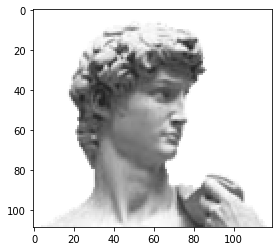

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
david = mpimg.imread(url)

print(david.shape)   #(109, 120, 4) => 4채널 이미지
plt.imshow(david);

In [3]:
def padding(image, padding_size):   #np.pad 함수 사용
    padded_image = np.pad(array=image, 
                          pad_width=((padding_size, padding_size), (padding_size, padding_size), (0,0)),   #padding_size만큼 덧댐
                          mode='constant', constant_values=0)
    return padded_image

(113, 124, 4)


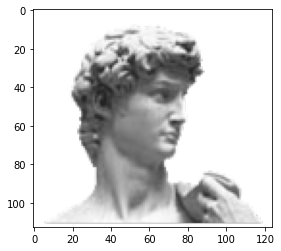

In [5]:
padded_david = padding(david, 2)

print(padded_david.shape)    #(113, 124, 4) => 채널 제외 4씩 증가
plt.imshow(padded_david);

In [14]:
#필터 적용 함수
def apply_filter(small_region, filter):
    conv = np.multiply(small_region, filter)
    return np.sum(conv)

#전체 이미지를 슬라이딩 하면서 apply_filter 함수를 적용하는 함수
def convolution(image, filter):
    row, col, channels = image.shape
    filter_width, filter_height = filter.shape
    thickness_row, thickness_col = (filter_width-1) // 2, (filter_height-1) // 2   #필터의 두께(중심점~끝)
    
    start = np.array([thickness_row, thickness_col])
    end = np.array([row, col]) - start
    #print(start, end, filter_width, filter_height)
    
    conv_img = np.zeros((row-(thickness_row*2), col-(thickness_col*2), channels))
    
    for channel in range(channels):
        for i in range(start[0], end[0]):
            for j in range(start[1], end[1]):
                conv_img[i-thickness_row, j-thickness_col, channel] = apply_filter(
                                    image[i-thickness_row:i+thickness_row+1, j-thickness_col:j+thickness_col+1, channel], filter)
    return conv_img

In [12]:
#상자필터 : 특정 픽셀 주변 값들의 평균을 취하는 필터(=평균필터)
box_filter = np.array([[1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9]])

#라플라시안 필터 : 외곽선 추출하는 필터
laplacian_filter = np.array([[1, 0, 1],
                      [0, -4, 0],
                      [1, 0, 1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


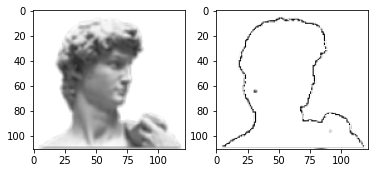

In [15]:
box_conv_david = convolution(padded_david, box_filter)
laplacian_conv_david = convolution(padded_david, laplacian_filter)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(box_conv_david)         #원본에 비해 흐려짐
ax2.imshow(laplacian_conv_david);  #윤곽선을 추출해냄 

### CNN 모델의 구성
패딩을 고려한 합성곱과 풀링이 순차적으로 이뤄지게 하는 것이 CNN의 신호연결이다.  
이 과정에 파라미터로 사용되는 것이 합성곱 필터의 가중치들이다.  
합성곱과 풀링이 반드시 번갈아 진행될 필요는 없으나, 풀링만으로 연결될 수는 없다.(정보를 줄이기만 할뿐이기 때문)  


필터 개수에 따라 합성곱 단계를 거쳐 몇 장의 이미지를 얻게 될지가 결정된다.(하나의 필터가 하나의 이미지를 생성)  
이 때 패딩 여부에 따라 이미지의 크기가 결정되며, 채널 수는 그대로 유지된다.  
이렇게 CNN을 통해 얻은 최종 이미지를 다층 퍼셉트론 형태의 전통적 신경망에 연결해야 한다.  
이를 위해 최종 이미지를 1차원 벡터로 만드는 flatten 과정을 거쳐야 한다.  
이렇게 얻은 1차원 벡터가 전통적 신경망의 input이 되고, 이후엔 Dense를 이용하여 최종 출력까지 신경망을 연결하면 된다.

In [16]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([keras.layers.Conv2D(input_shape=(64,64,3),           #최초의 합성곱 계층에는 입력이미지의 shape 알려줘야함
                                                     kernel_size=(3,3), filters=32),  #필터 사이즈, 필터 개수
                                 keras.layers.MaxPooling2D((2,2), strides=2),         #풀링 적용 영역 크기, stride 지정
                                 keras.layers.Conv2D(kernel_size=(3,3), padding='same', filters=64),])  #same : 출력이미지 크기가 입력과 같도록 유지, valid : 패딩 사용하지 않음